In [133]:
from importlib import reload
from scipy.stats import boxcox
from dfprepare import norm_data

import Task_3.LRR as LRR
reload(LRR)
from Task_3.LRR import *

,carbon_monoxide,tar,nicotine,weight
0,14.1,0.86,0.9853,13.6
1,16.0,1.06,1.0938,16.6
2,29.8,2.03,1.1650,23.5
3,8.0,0.67,0.9280,10.2
4,4.1,0.40,0.9462,5.4
5,15.0,1.04,0.8885,15.0
6,8.8,0.76,1.0267,9.0
7,12.4,0.95,0.9225,12.3
8,16.6,1.12,0.9372,16.3
9,14.9,1.02,0.8858,15.4


,carbon_monoxide,tar,nicotine,weight
0,0.454861,0.384211,0.526981,0.550000
1,0.520833,0.489474,0.812582,0.686364
2,1.000000,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.376152,0.395455
4,0.107639,0.142105,0.424059,0.177273
5,0.486111,0.478947,0.272177,0.613636
6,0.270833,0.331579,0.635957,0.340909
7,0.395833,0.431579,0.361674,0.490909
8,0.541667,0.521053,0.400369,0.672727
9,0.482639,0.468421,0.265070,0.631818


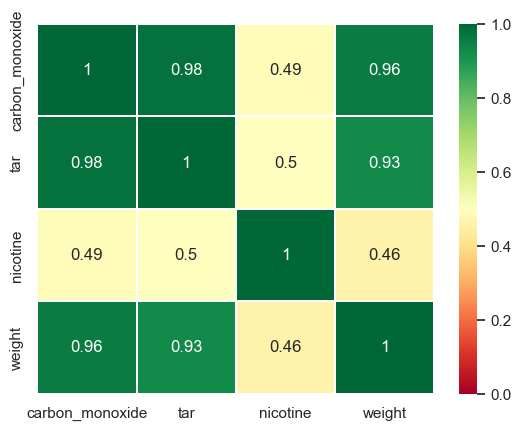

In [134]:
# Read dataframe
data = pd.read_csv('cigarettes.txt', names=['Brand', 'carbon_monoxide', 'tar', 'nicotine', 'weight'])
data = data.drop('Brand', axis=1)
data.dropna(inplace=True)
display(data)

# Normalization
data = norm_data(data)
display(data)

# Correlation
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)

# Dependent variable
explore_column = 'carbon_monoxide' 

### Строим базовую модель

                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     258.3
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           9.95e-17
Time:                        03:23:05   Log-Likelihood:                 51.120
No. Observations:                  25   AIC:                            -94.24
Df Residuals:                      21   BIC:                            -89.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0436      0.020     -2.230      0.0

,Variable,VIF,Tolerance
0,const,8.199589,0.121957
1,tar,7.338188,0.136273
2,nicotine,1.333667,0.749813
3,weight,7.011605,0.142621


,const,tar,nicotine,weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,4.972225,0.03680247114913934,21.0,1.0
1,0.0,1.0,0.0,0.0,43.030412,1.6959232406336958e-06,21.0,1.0
2,0.0,0.0,1.0,0.0,0.004155,0.9492141011532063,21.0,1.0
3,0.0,0.0,0.0,1.0,15.789224,0.0006920652484494694,21.0,1.0
4,"[1.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0]",1005.799098,1.1754333663979179e-23,21.0,4.0


,dfb_const,dfb_tar,dfb_nicotine,dfb_weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.010305,-0.257601,0.080907,0.258683,0.045853,1.647378,0.063306,0.428268,1.722848,0.447888
1,-0.022931,-0.023380,0.031074,0.023474,0.000576,0.107551,0.166207,0.048019,0.104988,0.046874
2,-1.113964,1.748143,0.437587,-1.186843,1.411701,1.759391,0.645920,2.376301,1.859498,2.511509
3,-0.200628,0.068926,0.053222,-0.031238,0.019624,-1.140943,0.056872,-0.280173,-1.149649,-0.282311
4,-0.043373,-0.000752,-0.014367,0.021287,0.000876,-0.144423,0.143771,-0.059180,-0.141012,-0.057783
5,0.005303,0.002482,-0.014528,0.002718,0.000093,0.050699,0.126748,0.019315,0.049480,0.018851
6,-0.096164,-0.118868,-0.151164,0.188609,0.022024,-0.743327,0.137515,-0.296810,-0.735148,-0.293544
7,-0.073103,-0.080587,0.074278,0.063113,0.005045,-0.475323,0.081996,-0.142057,-0.466383,-0.139385
8,0.002180,0.002799,-0.047204,0.023911,0.001932,0.269659,0.096071,0.087911,0.263617,0.085941
9,-0.002834,0.000823,0.009393,-0.004274,0.000042,-0.032474,0.138078,-0.012997,-0.031692,-0.012685


,student_resid,unadj_p,bonferroni(p)
0,1.722848,0.100344,1.0
1,0.104988,0.917431,1.0
2,1.859498,0.077732,1.0
3,-1.149649,0.263851,1.0
4,-0.141012,0.889271,1.0
5,0.049480,0.961028,1.0
6,-0.735148,0.470783,1.0
7,-0.466383,0.645981,1.0
8,0.263617,0.794772,1.0
9,-0.031692,0.975032,1.0


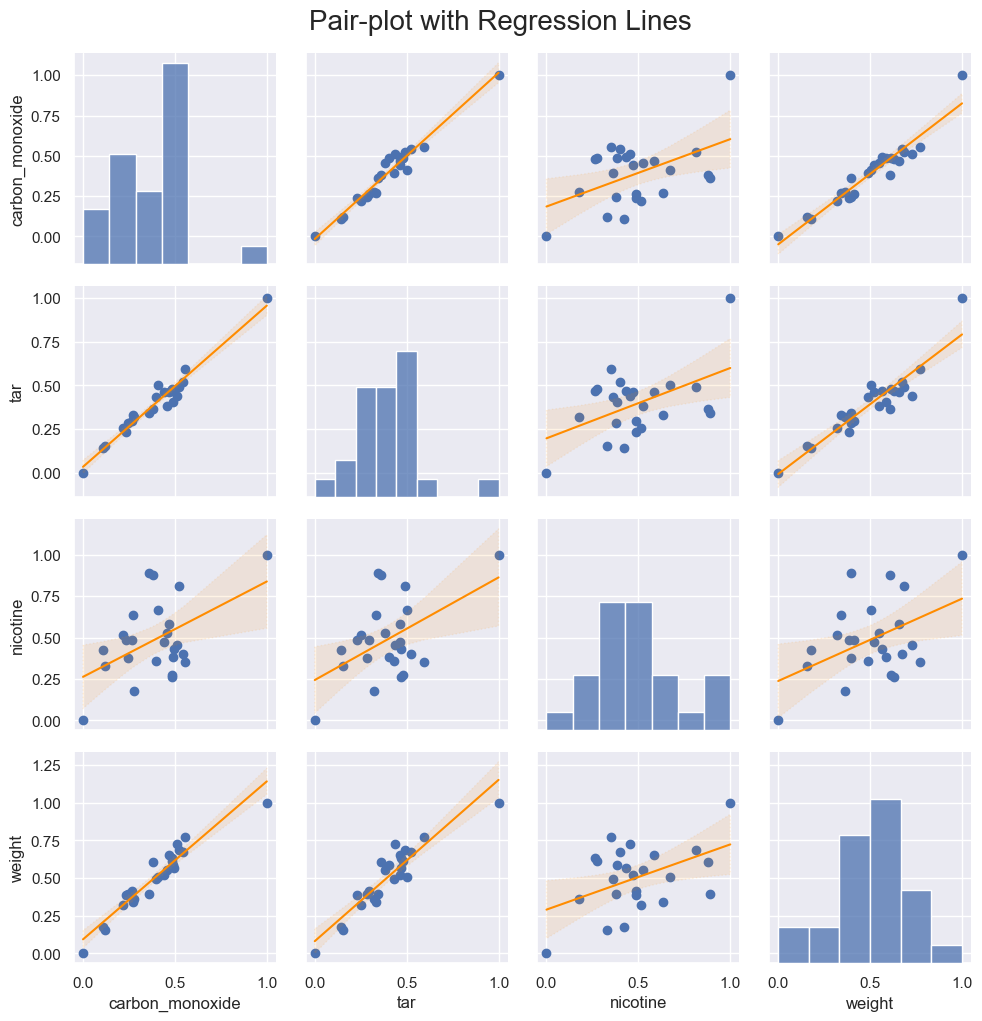

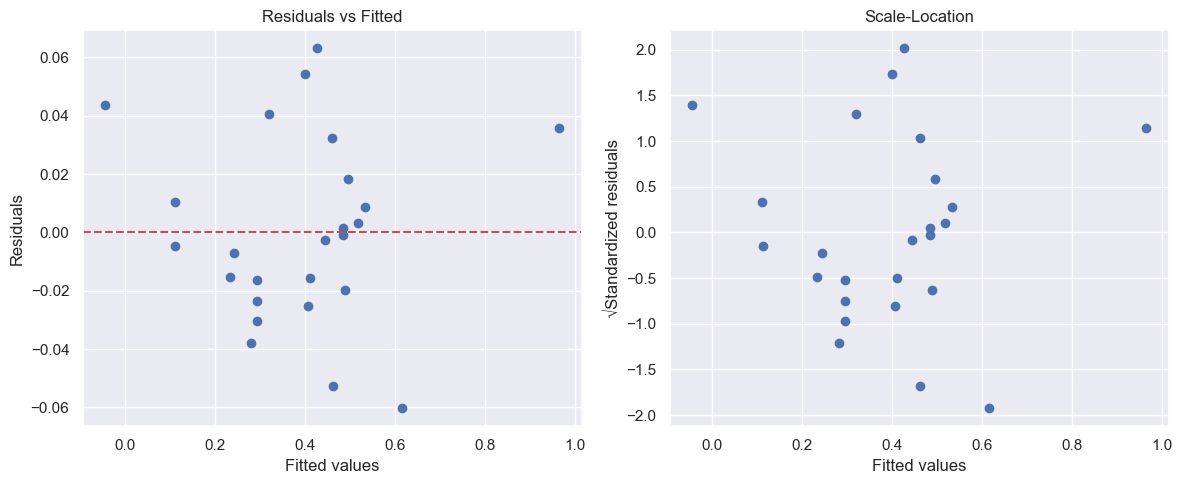

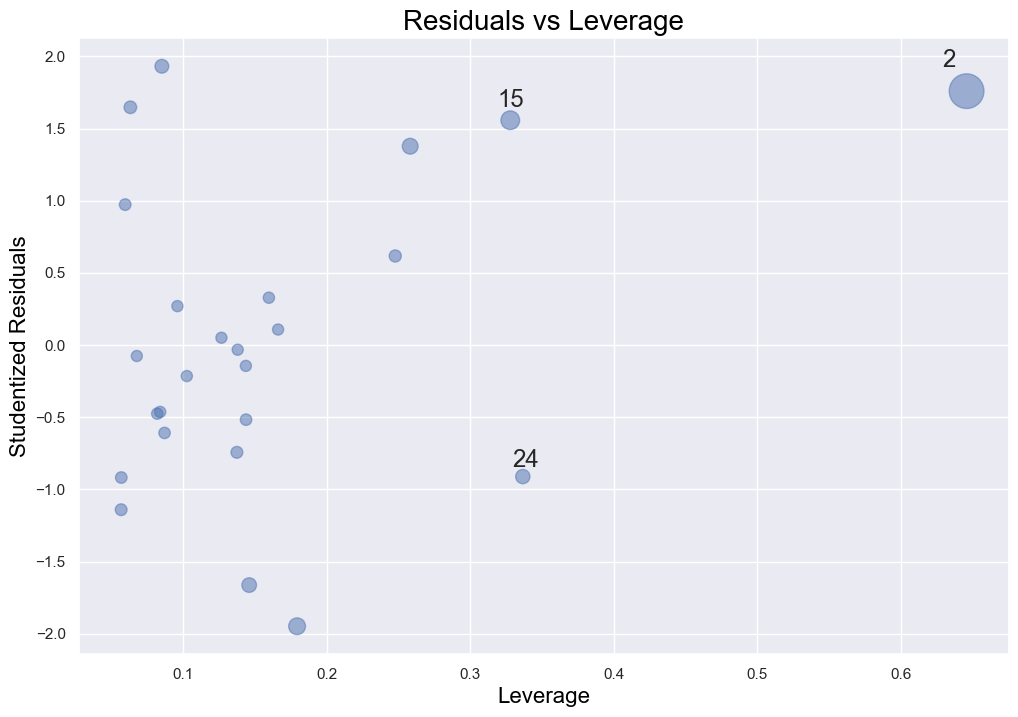

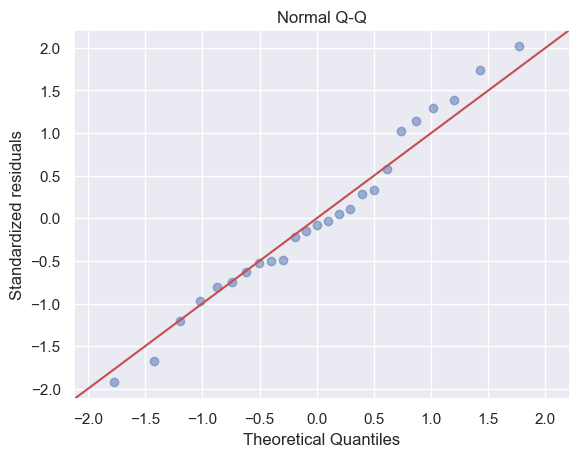

                                STEPS AIC                              
Selected Features: ['tar', 'nicotine', 'weight']
AIC: -94.23981158876805
Selected Features: ['tar', 'weight']
AIC: -96.23486563233041


In [135]:
base_research = LinearRegressionResearch(y=data[explore_column], x=data.drop(columns=explore_column))
base_research.info()
base_research.draw_plots()
new_data = base_research.stepwise_selection(criteria='AIC')

### Проведём исследование улучшенной модели с помощью (AIC/BIC)

In [136]:
display(new_data)

,carbon_monoxide,tar,weight
0,0.454861,0.384211,0.550000
1,0.520833,0.489474,0.686364
2,1.000000,1.000000,1.000000
3,0.243056,0.284211,0.395455
4,0.107639,0.142105,0.177273
5,0.486111,0.478947,0.613636
6,0.270833,0.331579,0.340909
7,0.395833,0.431579,0.490909
8,0.541667,0.521053,0.672727
9,0.482639,0.468421,0.631818


                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     161.2
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           7.10e-15
Time:                        03:23:13   Log-Likelihood:                 52.822
No. Observations:                  25   AIC:                            -93.64
Df Residuals:                      19   BIC:                            -86.33
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0147      0.027     -0.539

,Variable,VIF,Tolerance
0,const,16.475256,0.060697
1,tar,137.595039,0.007268
2,weight,148.706813,0.006725
3,tar&tar,1286.952029,0.000777
4,tar&weight,4545.193113,0.000220
5,weight&weight,1191.012751,0.000840


,const,tar,weight,tar&tar,tar&weight,weight&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,0.290222,0.5963346667128511,19.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.539405,0.4716472881192132,19.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.591326,0.22240522065927942,19.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.012094,0.9135827252140702,19.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.076511,0.7850685317301114,19.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.078108,0.7828972118875634,19.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",695.621465,3.2488413445123155e-21,19.0,6.0


,dfb_const,dfb_tar,dfb_weight,dfb_tar&tar,dfb_tar&weight,dfb_weight&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.086812,-0.341930,0.374108,-0.099616,0.168881,-0.243086,4.911721e-02,1.702821,0.092259,0.542866,1.800474,0.573998
1,0.003620,0.005404,-0.008470,-0.018321,0.013438,-0.006528,3.713481e-04,0.118345,0.137252,0.047203,0.115231,0.045961
2,0.523696,-1.798292,1.284185,1.821906,-0.870946,0.276818,1.709712e+01,1.306581,0.983631,10.128313,1.333028,10.333326
3,-0.011160,0.380647,-0.402747,0.065057,-0.158747,0.259256,4.407497e-02,-1.276048,0.139717,-0.514247,-1.298920,-0.523464
4,-0.154067,0.035922,-0.004590,0.013747,-0.020841,0.020021,6.015013e-03,-0.433672,0.161000,-0.189974,-0.424210,-0.185829
5,-0.006029,-0.005842,0.007244,-0.033920,0.031925,-0.028806,4.824937e-04,0.159798,0.101826,0.053805,0.155641,0.052405
6,-0.004675,-0.108587,0.089017,-0.070199,0.086362,-0.091488,4.215289e-03,-0.293965,0.226412,-0.159034,-0.286777,-0.155145
7,0.011464,-0.013481,0.005464,0.000421,0.001406,-0.000431,3.316824e-04,-0.130659,0.104402,-0.044610,-0.127231,-0.043440
8,0.001503,0.005420,-0.011104,-0.098760,0.085635,-0.065825,3.564551e-03,0.345841,0.151690,0.146244,0.337681,0.142794
9,-0.000078,-0.000207,0.000194,-0.000840,0.000782,-0.000677,3.718057e-07,0.004565,0.096696,0.001494,0.004443,0.001454


,student_resid,unadj_p,bonferroni(p)
0,1.800474,0.088567,1.000000
1,0.115231,0.909538,1.000000
2,1.333028,0.199150,1.000000
3,-1.298920,0.210365,1.000000
4,-0.424210,0.676439,1.000000
5,0.155641,0.878048,1.000000
6,-0.286777,0.777558,1.000000
7,-0.127231,0.900168,1.000000
8,0.337681,0.739510,1.000000
9,0.004443,0.996504,1.000000


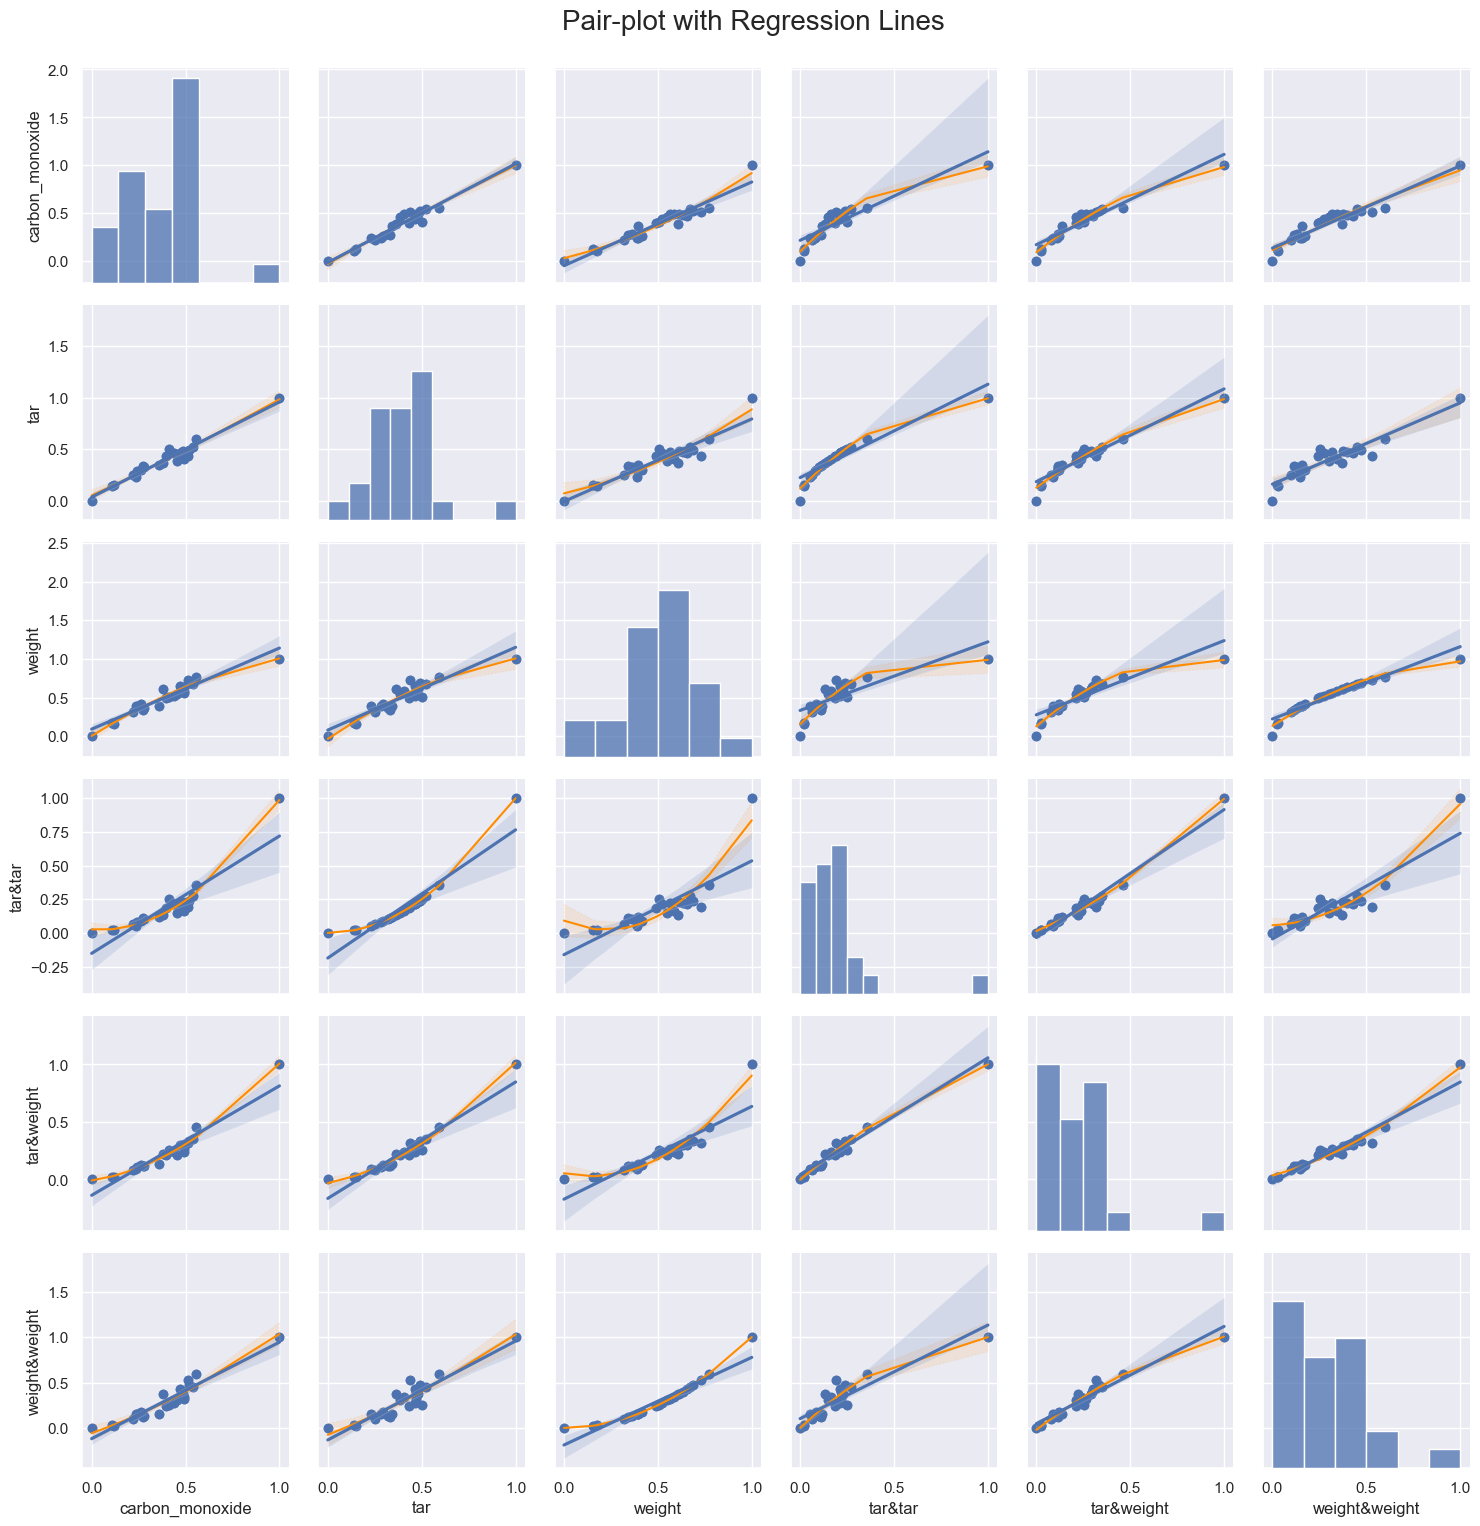

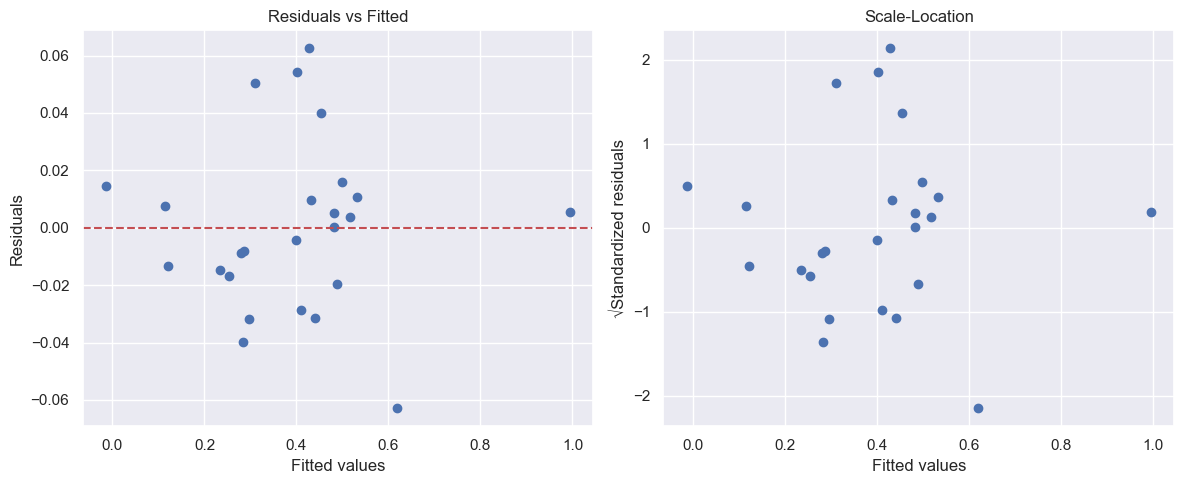

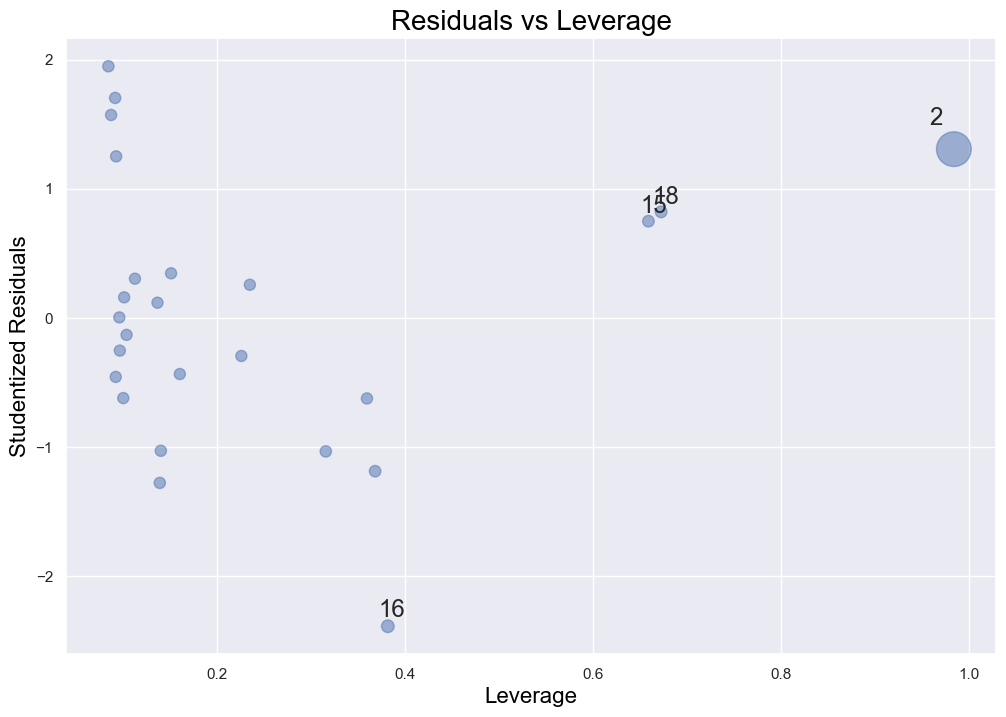

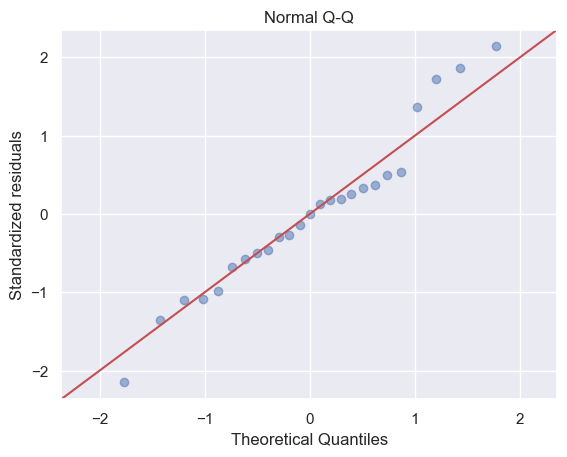

In [137]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data[explore_column], 
                                             x=new_data.drop(columns=explore_column), degree=2)
enhanced_research.info()
enhanced_research.draw_plots()

### Попытаемся улучшить уже улучшенную модель при помощи (Box-Cox)

In [138]:
# Применяем преобразование Бокса-Кокса к зависимой переменной
y_transformed, lambda_value = boxcox(data[explore_column] + 1e-6)  # + 1 чтобы не было 0-значений
new_data_t = new_data.copy()
new_data_t[explore_column] = y_transformed
display(new_data_t)

,carbon_monoxide,tar,weight
0,-6.276137e-01,0.384211,0.550000
1,-5.397048e-01,0.489474,0.686364
2,9.999998e-07,1.000000,1.000000
3,-9.529931e-01,0.284211,0.395455
4,-1.228423e+00,0.142105,0.177273
5,-5.853793e-01,0.478947,0.613636
6,-9.051851e-01,0.331579,0.340909
7,-7.106973e-01,0.431579,0.490909
8,-5.128836e-01,0.521053,0.672727
9,-5.900174e-01,0.468421,0.631818


                               carbon_monoxide                                
Dep. Variable:        carbon_monoxide   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     187.5
Date:                Thu, 07 Dec 2023   Prob (F-statistic):           1.75e-15
Time:                        03:23:32   Log-Likelihood:                 42.732
No. Observations:                  25   AIC:                            -73.46
Df Residuals:                      19   BIC:                            -66.15
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.6200      0.041    -39.723

,Variable,VIF,Tolerance
0,const,16.475256,0.060697
1,tar,137.595039,0.007268
2,weight,148.706813,0.006725
3,tar&tar,1286.952029,0.000777
4,tar&weight,4545.193113,0.000220
5,weight&weight,1191.012751,0.000840


,const,tar,weight,tar&tar,tar&weight,weight&weight,F-statistic,Prob (F-statistic),df_denom,df_num
0,1.0,0.0,0.0,0.0,0.0,0.0,1577.889084,9.46784170660376e-20,19.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.566715,0.22587599978773137,19.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,7.704671,0.012043190149092243,19.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.215619,0.6476749499278156,19.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.118050,0.7349315841430323,19.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.098474,0.7570879370260445,19.0,1.0
6,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0]",1102.400700,4.1712490927395194e-23,19.0,6.0


,dfb_const,dfb_tar,dfb_weight,dfb_tar&tar,dfb_tar&weight,dfb_weight&weight,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.074575,-0.293731,0.321373,-0.085574,0.145075,-0.208820,0.037756,1.492946,0.092259,0.475957,1.546677,0.493086
1,0.005142,0.007676,-0.012032,-0.026025,0.019089,-0.009272,0.000749,0.168041,0.137252,0.067024,0.163681,0.065285
2,1.232319,-4.231596,3.021840,4.287163,-2.049439,0.651386,67.252962,2.591377,0.983631,20.087752,3.136775,24.315552
3,-0.010758,0.366935,-0.388238,0.062713,-0.153029,0.249917,0.041207,-1.233828,0.139717,-0.497232,-1.252129,-0.504607
4,0.148926,-0.034723,0.004437,-0.013288,0.020145,-0.019353,0.005624,0.419335,0.161000,0.183693,0.410053,0.179627
5,0.001278,0.001239,-0.001536,0.007192,-0.006769,0.006108,0.000022,-0.033905,0.101826,-0.011416,-0.033002,-0.011112
6,-0.002077,-0.048239,0.039545,-0.031185,0.038365,-0.040643,0.000835,-0.130830,0.226412,-0.070779,-0.127398,-0.068922
7,0.036742,-0.043207,0.017512,0.001349,0.004507,-0.001382,0.003379,-0.417021,0.104402,-0.142382,-0.407769,-0.139223
8,0.001002,0.003613,-0.007402,-0.065836,0.057086,-0.043880,0.001590,0.230950,0.151690,0.097661,0.225107,0.095190
9,0.001493,0.003939,-0.003691,0.016003,-0.014885,0.012896,0.000135,-0.086921,0.096696,-0.028439,-0.084619,-0.027686


,student_resid,unadj_p,bonferroni(p)
0,1.546677,0.139342,1.000000
1,0.163681,0.871806,1.000000
2,3.136775,0.005701,0.142532
3,-1.252129,0.226549,1.000000
4,0.410053,0.686607,1.000000
5,-0.033002,0.974036,1.000000
6,-0.127398,0.900038,1.000000
7,-0.407769,0.688253,1.000000
8,0.225107,0.824432,1.000000
9,-0.084619,0.933498,1.000000


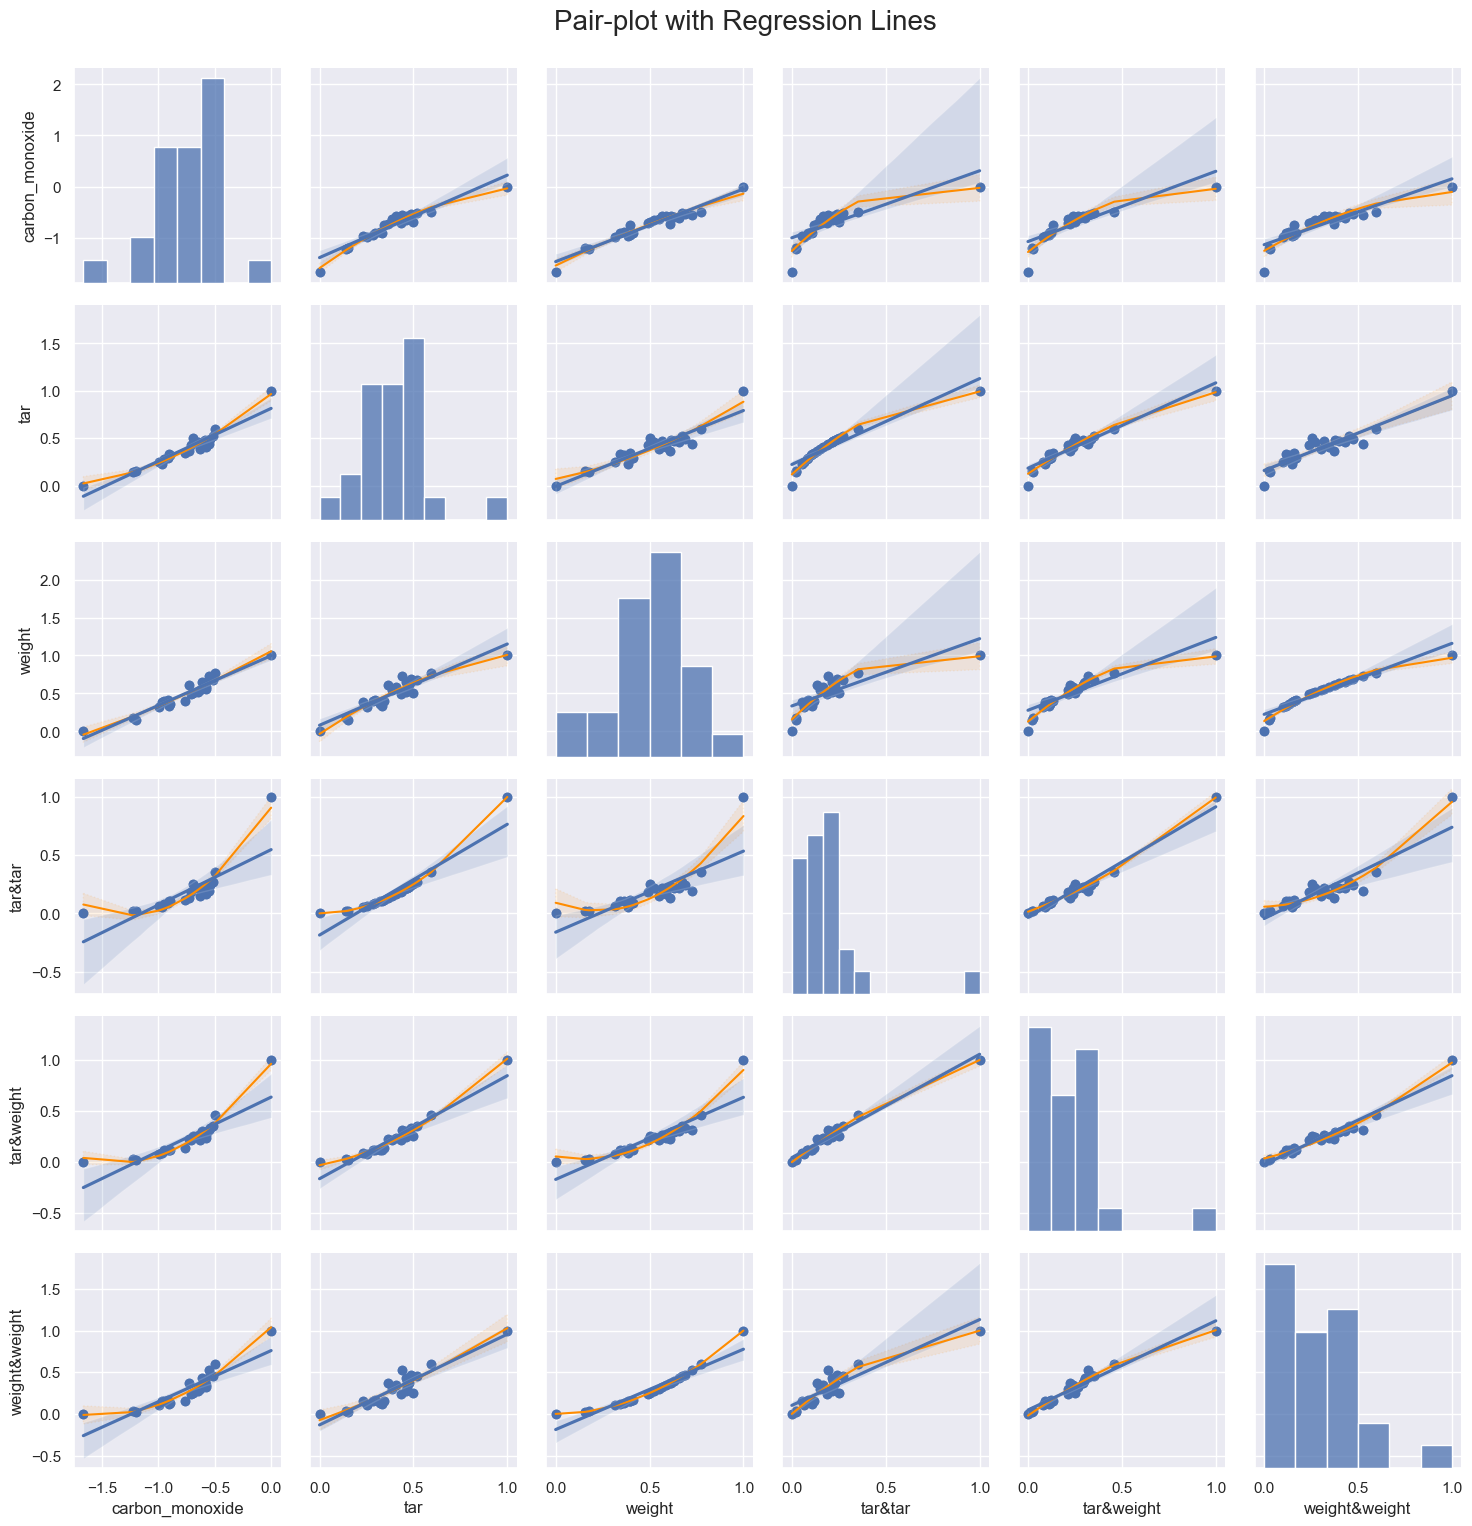

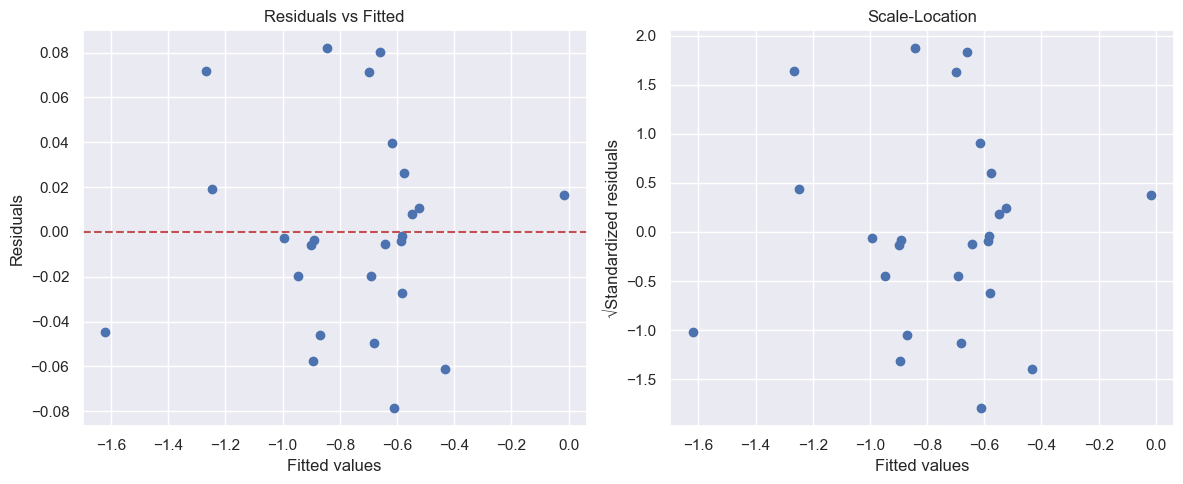

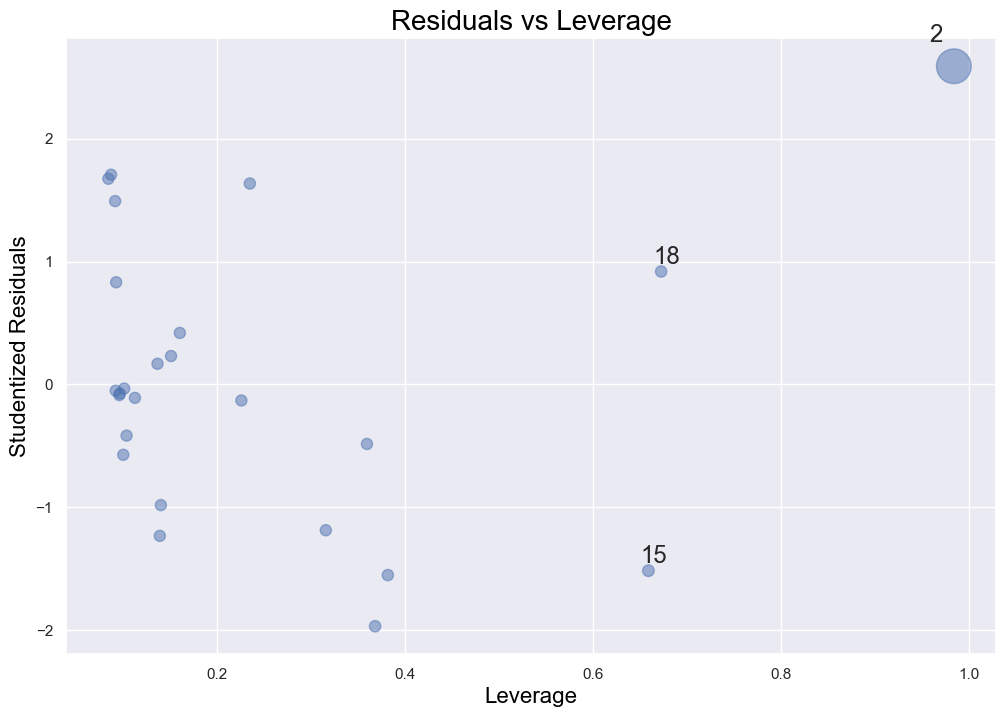

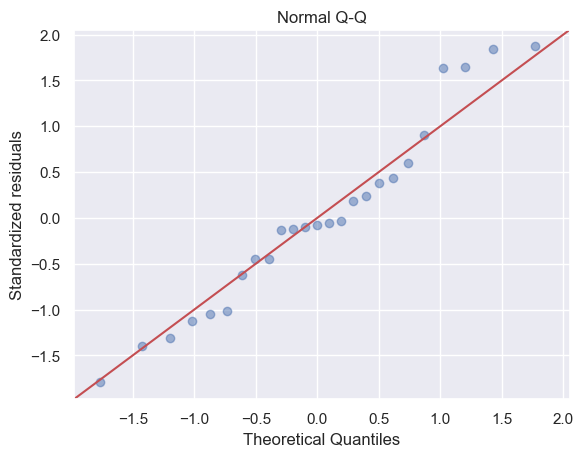

In [139]:
# Проводим анализ заново
enhanced_research = LinearRegressionResearch(y=new_data_t[explore_column], 
                                             x=new_data_t.drop(columns=explore_column), degree=2)
enhanced_research.info()
enhanced_research.draw_plots()